# Behavioral Cloning Notebook

In [2]:
import csv
import numpy as np
from random import shuffle
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Conv2D, Cropping2D
from sklearn.utils import shuffle as sk_shuffle

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Import driving log
samples = []
with open('./driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

In [4]:
# Split into training and validation datasets
train_samples, validation_samples = train_test_split(samples, test_size = 0.2)

Center Image


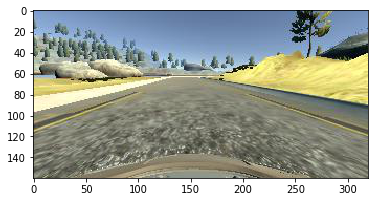

Center flipped Image


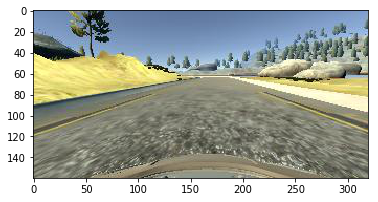

Left Image


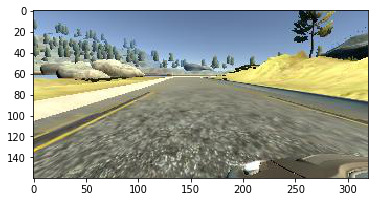

Right Image


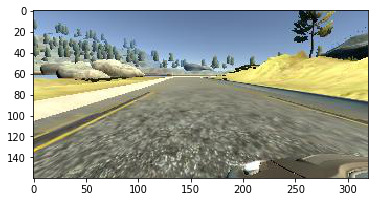

In [6]:
# Show first center image
name = "./IMG/" +train_samples[0][0].split("\\")[-1]

print("Center Image")
img = cv2.imread(name)
cv2.imwrite("img_center1.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# Show first center image flipped
print("Center flipped Image")
img = np.fliplr(img)
cv2.imwrite("img_center1_flip.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# Show first left image
name = "./IMG/" +train_samples[0][1].split("\\")[-1]

print("Left Image")
img = cv2.imread(name)
cv2.imwrite("img_left1.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Show first right image
name = "./IMG/" +train_samples[0][1].split("\\")[-1]

print("Right Image")
img = cv2.imread(name)
cv2.imwrite("img_right1.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
def generator(samples, batch_size = 32, angle_offset = 0.2):
    num_samples = len(samples)
    while 1:
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset + batch_size]
            
            images = []
            angles = []
            for batch_sample in batch_samples:
                # Center Image
                name = "./IMG/" + batch_sample[0].split("\\")[-1]
                center_image = cv2.imread(name)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)
                
                # Flip image
                images.append(np.fliplr(center_image))
                angles.append(-center_angle)
                
                # Left Image
                name = "./IMG/" + batch_sample[1].split("\\")[-1]
                left_image = cv2.imread(name)
                left_angle = float(batch_sample[3]) + angle_offset
                images.append(left_image)
                angles.append(left_angle)
                
                # Flip image
                images.append(np.fliplr(left_image))
                angles.append(-left_angle)
                
                
                # Right Image
                name = "./IMG/" + batch_sample[2].split("\\")[-1]
                right_image = cv2.imread(name)
                right_angle = float(batch_sample[3]) - angle_offset
                images.append(right_image)
                angles.append(right_angle)
                
                # Flip image
                images.append(np.fliplr(right_image))
                angles.append(-right_angle)
                
                
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sk_shuffle(X_train, y_train)                  

In [8]:
train_generator = generator(train_samples, batch_size = 32)
validation_generator = generator(validation_samples, batch_size = 32)

In [9]:
# Train model
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping = ((60, 20), (0, 0))))
model.add(Conv2D(24, 5, 5, subsample = (2, 2), activation="relu"))
model.add(Conv2D(36, 5, 5, subsample = (2, 2), activation="relu"))
model.add(Conv2D(48, 5, 5, subsample = (2, 2), activation="relu"))
model.add(Conv2D(64, 3, 3, activation="relu"))
model.add(Conv2D(64, 3, 3, activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss = "mse", optimizer = "adam")
model.fit_generator(train_generator, samples_per_epoch=len(train_samples)*6, 
                    validation_data=validation_generator, 
                    nb_val_samples=len(validation_samples), nb_epoch=10)
model.save("model.h5")

C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  '` call to the Keras 2 API: ' + signature)
C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  '` call to the Keras 2 API: ' + signature)
C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  '` call to the Keras 2 API: ' + signature)
C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  '` call to the Keras 2 API: ' + signature)
C:\Users

Epoch 1/10


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\engine\training.py", line 1876, in fit_generator
    class_weight=class_weight)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\engine\training.py", line 1620, in train_on_batch
    outputs = self.train_function(ins)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\backend\tensorflow_backend.py", line 2075, in __call__
    feed_dict=feed_dict)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\client\session.py", line 766, in run
    run_metadata_ptr)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\client\session.py", line 964, in _run
    feed_dict_string, options, run_metadata)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\client\session.py", line 1014, in _do_run
    target_list, options, run_metadata)
  File

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\engine\training.py", line 1876, in fit_generator
    class_weight=class_weight)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\engine\training.py", line 1620, in train_on_batch
    outputs = self.train_function(ins)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\keras\backend\tensorflow_backend.py", line 2075, in __call__
    feed_dict=feed_dict)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\client\session.py", line 766, in run
    run_metadata_ptr)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\client\session.py", line 964, in _run
    feed_dict_string, options, run_metadata)
  File "C:\Users\Justin\Anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\client\session.py", line 1014, in _do_run
    target_list, options, run_metadata)
  File

TypeError: Can't convert 'list' object to str implicitly